
<div>
<img src="Images/LOGO.png" width="300" align="right">
</div>

# Learning Healthcare Systems

Estaimted time needed: **6** hours

## Objectives

After completing this course you will be able to:

-   Acquire data in various ways
-   Obtain insights from Data with Pandas library



<h1 id="data_acquisition">Data Acquisition</h1>
<p>
In this section, you will learn how to load a dataset into a Jupyter Notebook and create a cohort for the futher analysis.<br>
As an example, we will use the Type-2 Diabetes (T2D) dataset. It includes data extracted from the Indiana Network for Patient Care for patients presenting with Diabetes.<br>
    <br>
    The dataset consists of 5 tables in CSV (comma separated value) format:
    
-   Patients table 
-   Prescription medication table 
-   Encounters table 
-   Diagnoses table 
-   Clinical variables (e.g. tests, measurements etc.) table 
    
Deatailed dataset description: <a href="https://github.com/regenstrief/T15Training/blob/master/Dictionaries/Data%20Dictionary%20-%20T2D.md" target="_blank">https://github.com/regenstrief/T15Training/blob/master/Dictionaries/Data%20Dictionary%20-%20T2D.md</a></li>

The Pandas Library is a useful tool for data manipulation and analysis. 
</p>


In [1]:
import pandas as pd 
import ipywidgets as widgets
import qgrid
import sweetviz as sv
from ipywidgets import interact, interact_manual
#for qgrid desnt work
#jupyter nbextension enable --py --sys-prefix qgrid
#jupyter nbextension enable --py --sys-prefix widgetsnbextension

import functions_for_LHS_workshops

<h2>Read Data</h2>
<p>
We use <code>pandas.read_csv()</code> function to read csv files. In the brackets, we put the file name and path, so that Pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.<br>

You can also assign the dataset to any variable you create.
</p>

In [2]:
patients_df = pd.read_csv('patients.csv', sep=',')
diagnosis_df = pd.read_csv('diagnosis.csv', sep=',')
encounters_df = pd.read_csv('encounters.csv', sep=',')
medication_df = pd.read_csv('medication.csv', sep=',')

<h1 id="basic_insight">Basic Insights of the Dataset</h1>
<p>
Next step after reading data into a Pandas dataframe, is data exploration.<br>
There are several ways to obtain essential insights of the data to help us better understand our dataset.
</p>


<h2>Analysis of tables content</h2>
<p>
Choose a table below to see its view.<br>
    Grid allows to <b>filter</b> and <b>sort</b> data by any column. <br>
    You will be able <b>to get detailed description</b> of each colomn by pointing your mouse on a column name.
</p>

In [3]:
items = ['patients', 'medication','diagnosis', 'encounters']

def dataframe_2_qgrid(x):
    col_opts = {'editable': False}

    grid_options={'forceFitColumns': False, 
              'defaultColumnWidth': 220,'highlightSelectedCell': True }

    if x=='patients':
        df = patients_df
        column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }, 
                            'STUDYID': { 'toolTip': "Patient identifier"} ,
                            'INDEX_YEAR': { 'toolTip': "Year of Diabetes Diagnosis"} , 
                            'INDEX_AGE': {'toolTip': "Age at Diagnosis"},
                            'GENDER': {'_tablestoolTip': "Gender"} , 
                            'RACE': {'toolTip': "Race"} , 
                            'T2D_STATUS': {'toolTip': "Describes how the patient was identified as a T2D patient.\n 1. ICD diagnosis alone\n 2. HbA1C alone\n 3. Meds alone\n 4. Combination of any of the above."},
                            'COMBINATION': {'toolTip': " of any of the above."} , 
                            'CARDIOVASCULAR': {'toolTip': "Cardiovascular disease status: Yes/No"} , 
                            'NEPHROPATHY': {'toolTip': "Nephropathy status: Yes/No"} , 
                            'LIVER': {'toolTip': "Liver disease status: Yes/No"} , 
                            'ENC_12M_BF': {'toolTip': "Encounters in 12 month period before index event"} , 
                            'ENC_12M_AF': {'toolTip': "Encounters in 12 month period after index event"} , 
                            'ENC_YRS_BF': {'toolTip': "Number of years of encounter data before the index event"} , 
                            'ENC_YRS_AF': {'toolTip': "Number of years of encounter data after the index event"} , 
                            'BIOBANK': {'toolTip': "Availability of biobank data for patient: Yes/No"} , 
                                   }
    elif x=='medication':
        df = medication_df            
        column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }, 
                            'STUDYID': { 'toolTip': "Patient identifier"} ,
                            'DRUG_NAME': { 'toolTip': "Name of the drug"} , 
                            'STRENGTH': {'toolTip': "Strength (e.g. 20mg, 500 mg etc)"},     
                            'NUMBER_OF_DAYS_SUPPLY': {'toolTip': "Total number of days supplied"},
                            'DAYS_MED_INDEX': {'toolTip': "Day medication was prescribed in terms of days from/to the index event a given medication was prescribed"},
                            'NDC_CODE': {'toolTip': "11-digit national drug code"},
                            'DISPENSE_AMOUNT': {'toolTip': "Number of pills/units dispensed"}
                        
                                    }
    elif x=='encounters':
        df = encounters_df            
        column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }, 
                            'STUDYID': { 'toolTip': "Patient identifier"} ,
                            'DAYS_ENC_INDEX': { 'toolTip': "Encounter day in terms of days from/to index event"} ,
                            'CARE_SETTING_NAME': { 'toolTip': "Care setting\n(e.g. Outpatient, Inpatient etc.)"} ,
                            'LOCATION_POINT_OF_CARE': { 'toolTip': "Actual location\n( e.g. X hospital, Y Pharmacy etc.)"} ,
                                           }
        
    elif x=='diagnosis':
        df = diagnosis_df            
        column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }, 
                            'STUDYID': { 'toolTip': "Patient identifier"} ,
                            'DAYS_DX_INDEX': { 'toolTip': "Number of days from/to index event"} ,
                            'DX_CODE': { 'toolTip': "ICD9 diagnosis code"} ,
                                           }
        
    gri=qgrid.show_grid(df,column_options=col_opts, grid_options=grid_options, column_definitions=column_definitions)
    return gri

w = widgets.Dropdown(
    options=items,
    #value=patients_df.columns[4],
    description='Select a table to view:',
    disabled=False,
    style={'description_width': 'max-content'},
)

interact(dataframe_2_qgrid, x=w)

interactive(children=(Dropdown(description='Select a table to view:', options=('patients', 'medication', 'diag…

<function __main__.dataframe_2_qgrid(x)>

In [4]:
# I don't know should any activity be included into Jupyter, but here is my offer of how to organise it.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1>Activity 1: </h1>
<b>Check data types of 'diagnosis_df' dataframe.</b>
</div>

In [5]:
#student's solution

Double-click <b>here</b> to see the solution.

<!-- The answer is below:

diagnosis_df.dtypes

-->

<h2>Exploratory Data Analysis of the tables</h2>

To get a statistical summary of each column, such as, count, column mean value or column standard deviation use 'describe' method:
<p>
This method shows statistical summaries of all numeric-typed (int, float) columns.<br>
For example, the attribute <b>"INDEX_YEAR"</b> (Year of Diabetes Diagnosis) has 77,908 <b>counts</b>, the <b>mean</b> value of this column is 2008, the <b>median value</b> is 2009, the <b>standard deviation</b> is 3.96, the minimum value is 1995, 25th percentile is 2006, 75th percentile is 2012, and the <b>maximum value</b> is 2015.
<br>

In [6]:
def df_2_visualized_EDA(x):
    if x=='patients':
        df = patients_df
    elif x=='medication':
        df = medication_df 
    elif x=='encounters':
        df = encounters_df 
    elif x=='diagnosis':
        df = diagnosis_df
    analysis = sv.analyze(df)  
    #analysis.show_html('mtcars.html')
    return analysis.show_notebook()
    

interact(df_2_visualized_EDA, x=w)

interactive(children=(Dropdown(description='Select a table to view:', options=('patients', 'medication', 'diag…

<function __main__.df_2_visualized_EDA(x)>

<h2>Creation of a cohort </h2>
<p>
The main goal of this section is to create a cohort for identification of outpatient clinic patients who are at higher risk of hospitalisation or ED visit. The following steps should be taken to build the dataset:
- Analysis of tables that will be used as data sources for creation of the cohort (Figure 1.A.)
- Creation of a table with inpatients who were hospitalised with diabeties. This table is based on 'Encounters' (identifies the fact of admission) and 'Diagnosis' (identifies the reason of admission) tables (Figure 1.B.)
- Joining 'Patients' table with the table obtained on step 2. (Figure 1.C.)
- Joining 'Medication' table with the table obtained on step 3. (Figure 1.C.)
    </p>

<div>
<img src="Images/data_linkage.png" width="1000" >
</div>

Creation of a digital phenotype (Figure 1.B.):

In [7]:
# Filtering table 'Encounters' by type of care setting name and time offset between hospitalisation and a day
# when a patient was diagnosed with diabetes:
encounters_inp_df=encounters_df[(encounters_df['CARE_SETTING_NAME'].str.contains('INPATIENT')) & (encounters_df['DAYS_ENC_INDEX']>0)]

In [8]:
# Filtering table 'Diagnosis' by ICD-9 code (250.00) and time offset between a day when a patient was diagnosed 
# with diabetes and a date when diagnosis diabetes was mentioned for the second time:
diagnosis_diab_df=diagnosis_df[diagnosis_df['DX_CODE'].str.contains('250\.0') & (diagnosis_df['DAYS_DX_INDEX']>0)]

In [9]:
# Joining filtered 'Encounters' and 'Diagnosis' tables:
inp_diab = pd.merge(encounters_inp_df, diagnosis_diab_df, on='STUDYID', how='inner')
# Add additional condition that the time between admission and diabetes diagnosis should be less than 30 days:
#inp_diab=inp_diab[(inp_diab['DAYS_DX_INDEX'] <= (inp_diab['DAYS_ENC_INDEX']+30)) & (inp_diab['DAYS_DX_INDEX']>=inp_diab['DAYS_ENC_INDEX'])]
inp_diab=inp_diab[(inp_diab['DAYS_DX_INDEX'] == inp_diab['DAYS_ENC_INDEX']) & (inp_diab['DAYS_DX_INDEX']>=inp_diab['DAYS_ENC_INDEX'])]

# Selection of unique records only:
inp_diab=inp_diab[['STUDYID','CARE_SETTING_NAME']].drop_duplicates()

In [42]:
# Creation of binary features: 
# MED_PRESCR - identifies if data about medication is available
# METFORMIN_HYDROCHLORIDE - identifies a fact that a patient was prescribed with Metformin Hydrochloride
# INSULIN_GLARGINE - binary feature, identifies a fact that a patient was prescribed with Insulin Glargine
medication_df['MED_PRESCR']=medication_df['NDC_CODE'].apply(lambda x: 1 if x is not None else 0)
medication_df['METFORMIN_HYDROCHLORIDE']=medication_df['NDC_CODE'].apply(lambda x: 1 if x in (68382002810,68382003010,93726701) else 0)
medication_df['INSULIN_GLARGINE']=medication_df['NDC_CODE'].apply(lambda x: 1 if x  in(88222033, 88221905) else 0)
# creation of pivoted table with information about mediction for each patient
medication_per_pat = medication_df.groupby(['STUDYID'], as_index=False).agg(MED_PRESCR = ('MED_PRESCR', pd.Series.max), COUNT_NDC_CODES=('NDC_CODE', pd.Series.count), UNIQUE_NDC_CODES=('NDC_CODE', pd.Series.nunique)
                                                                     , METFORMIN_HYDROCHLORIDE =('METFORMIN_HYDROCHLORIDE', pd.Series.max),  INSULIN_GLARGINE =('INSULIN_GLARGINE', pd.Series.max))
#medication_per_pat

Link the data to the final cohort (Figure 1.C.):

In [43]:
#Joining 'Patients' table abd the table obtained on the previous step:
cohort = pd.merge(patients_df, inp_diab, on='STUDYID', how='left')

In [44]:
#Joining 'Medication' table abd the table obtained on the previous step:
cohort = pd.merge(cohort, medication_per_pat, on='STUDYID', how='left')

In [45]:
#Changing name of the column from 'CARE_SETTING_NAME' to 'LABEL':
cohort.rename(columns={'CARE_SETTING_NAME':'LABEL'}, inplace=True)
#For all rows containing 'INPATIENT' value, set value in 'lABEL' column to 1:
cohort.loc[(cohort['LABEL'] == 'INPATIENT') , 'LABEL'] = 1
#For other patients set label to 0:
cohort['LABEL'].fillna(0, inplace=True)
cohort['MED_PRESCR'].fillna(0, inplace=True)

In [46]:
#Removing irrelevant or label-related columns:
cohort.drop(columns=['STUDYID','ENC_12M_AF', 'ENC_YRS_BF', 'ENC_YRS_AF', 'BIOBANK'], inplace=True)

#Show number of rows and columns in the final cohort:
cohort.shape
print("Obtained dataset has {} rows and {} columns.".format(cohort.shape[0], cohort.shape[1]))

Obtained dataset has 77908 rows and 15 columns.


<h2>View of the dataset</h2>
<p>
To have a look at the final cohort use the grid below. <br>
This grid allows to <b>filter</b> and <b>sort</b> data by any column. <br>
You will be able <b>to get detailed description</b> of each colomn by pointing your mouse on a column name.
</p>

In [49]:
items = ['patients', 'medication','diagnosis', 'encounters']

def cohort_2_qgrid(x):
    col_opts = {'editable': False}

    grid_options={'forceFitColumns': False, 
              'defaultColumnWidth': 220,'highlightSelectedCell': True }

    df = cohort
    column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }, 
                        'STUDYID': { 'toolTip': "Patient identifier"} ,
                        'INDEX_YEAR': { 'toolTip': "Year of Diabetes Diagnosis"} , 
                        'INDEX_AGE': {'toolTip': "Age at Diagnosis"},
                        'GENDER': {'toolTip': "Gender"} , 
                        'RACE': {'toolTip': "Race"} , 
                        'T2D_STATUS': {'toolTip': "Describes how the patient was identified as a T2D patient.\n 1. ICD diagnosis alone\n 2. HbA1C alone\n 3. Meds alone\n 4. Combination of any of the above."},
                        'COMBINATION': {'toolTip': " of any of the above."} , 
                        'CARDIOVASCULAR': {'toolTip': "Cardiovascular disease status: Yes/No"} , 
                        'NEPHROPATHY': {'toolTip': "Nephropathy status: Yes/No"} , 
                        'LIVER': {'toolTip': "Liver disease status: Yes/No"} , 
                        'ENC_12M_BF': {'toolTip': "Encounters in 12 month period before index event"} , 
                        'LABEL': {'toolTip': "Label. \n 1 - patient has information about admission to hospital due to diabetes.\n 0 - patient was not admitted to a hospital. "} , 
                        'MED_PRESCR': {'toolTip': "Identifies if data about medication is available"} , 
                        'COUNT_NDC_CODES': {'toolTip': "Total number of prescribed medication types based on NDC code"} , 
                        'UNIQUE_NDC_CODES': {'toolTip': "Number of unique prescribed medication types based on NDC code"} , 
                        'METFORMIN_HYDROCHLORIDE': {'toolTip': "Identifies a fact that a patient was prescribed with Metformin Hydrochloride"} , 
                        'INSULIN_GLARGINE': {'toolTip': "Identifies a fact that a patient was prescribed with Insulin Glargine."} , 
                        
                               }
   
        
    gri=qgrid.show_grid(df,column_options=col_opts, grid_options=grid_options, column_definitions=column_definitions)
    return gri

cohort_2_qgrid(cohort)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

<h2>Save the dataset</h2>
<p>
Correspondingly, Pandas library allows to save the dataset to '.csv' file by using <code>dataframe.to_csv()</code> method. It is possible to add the file path and name along with quotation marks in the brackets.
</p>
<p>
    For example, to save the dataframe <b>cohort</b> as <b>cohort_t2d.csv</b> to the local machine, use the syntax below:
</p>


In [16]:
cohort.to_csv("cohort_t2d.csv", index=False)

<h1>Exploratory Data Analysis of the cohort</h1>

                                             |                                             | [  0%]   00:00 ->…


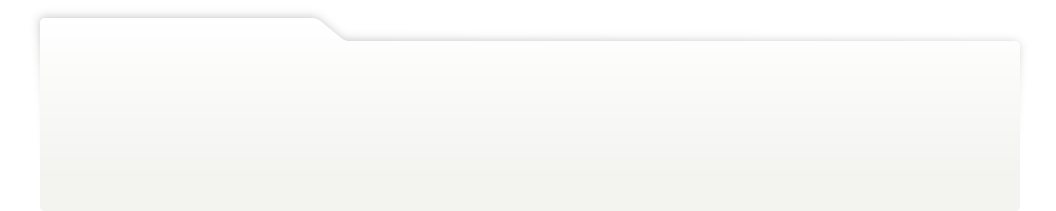
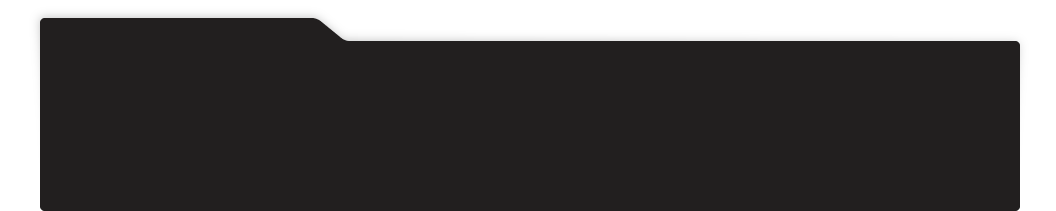
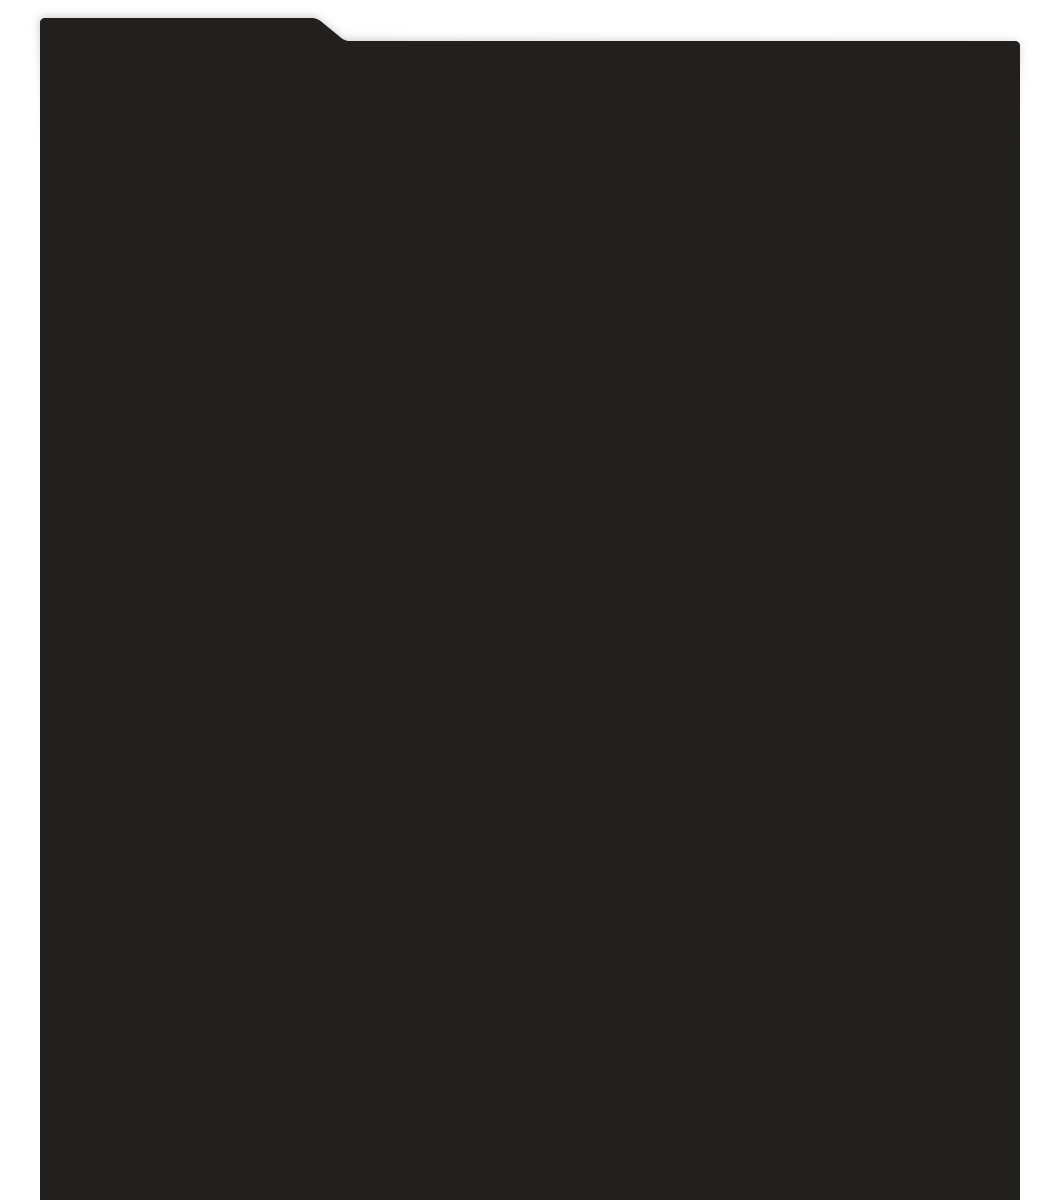
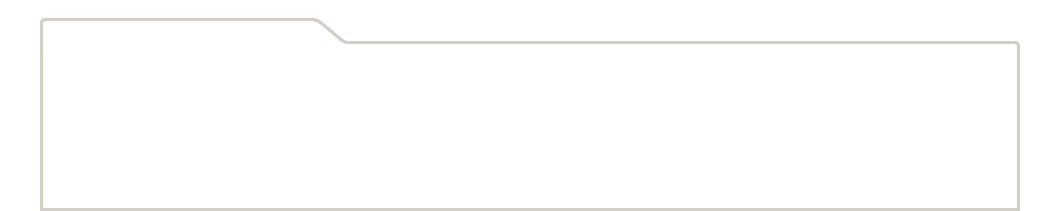
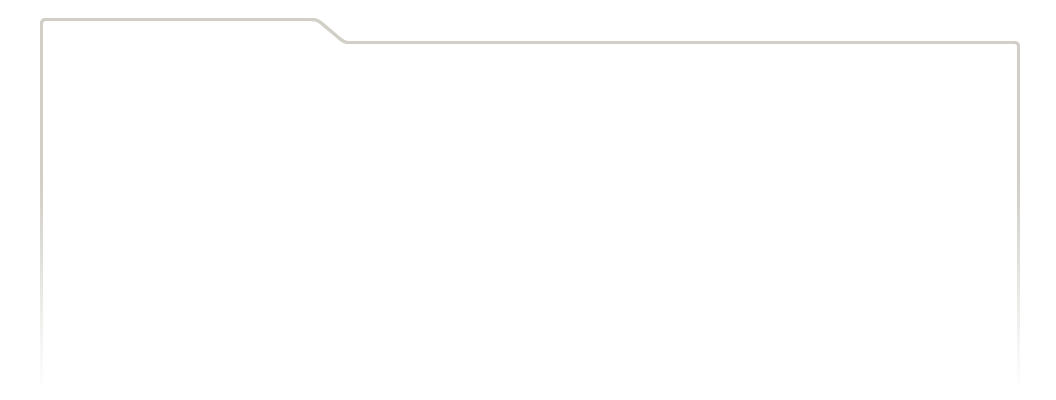
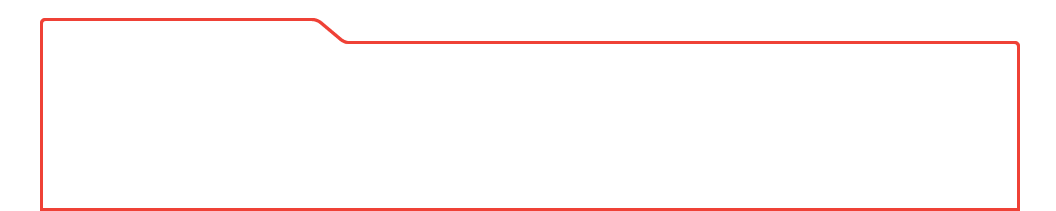
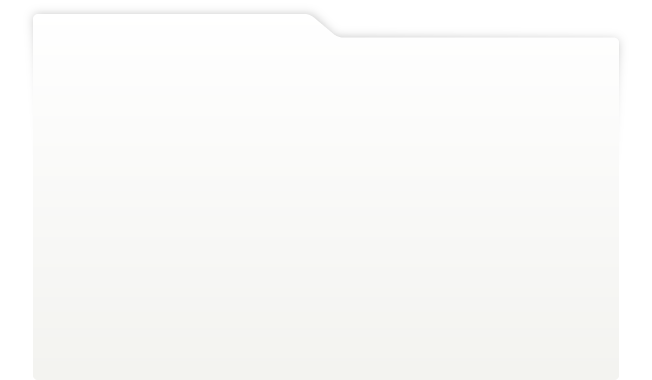
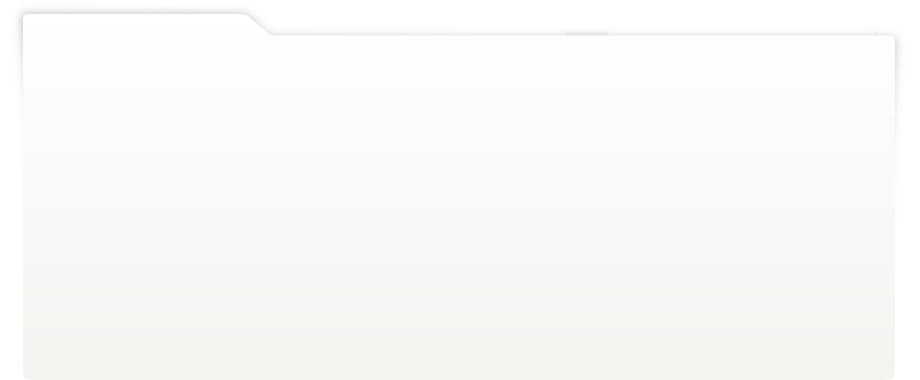
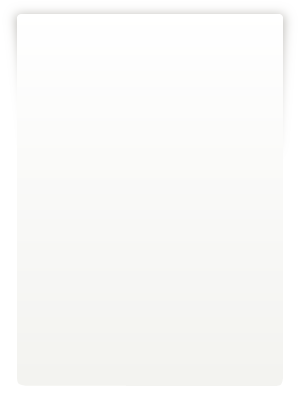
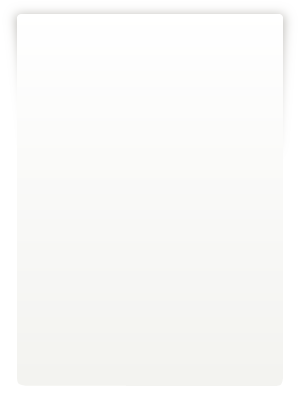
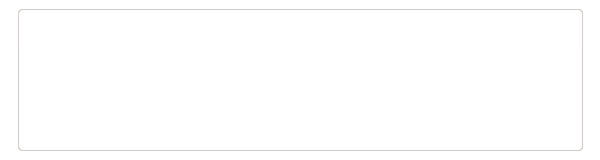
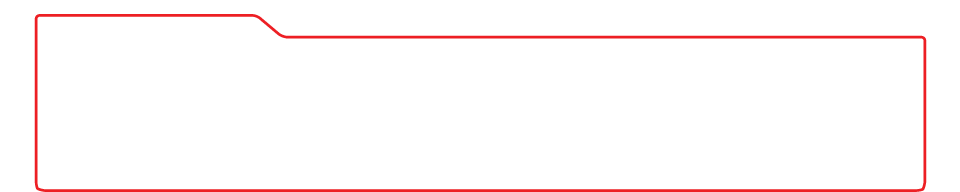
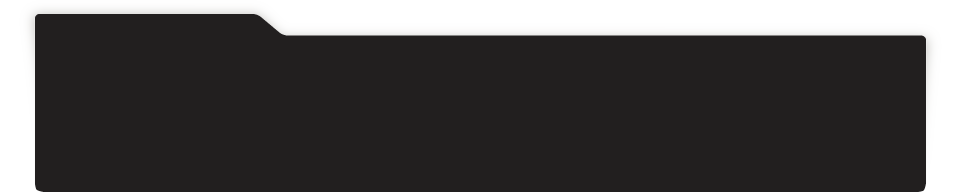
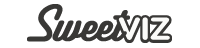
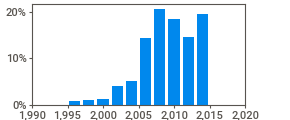
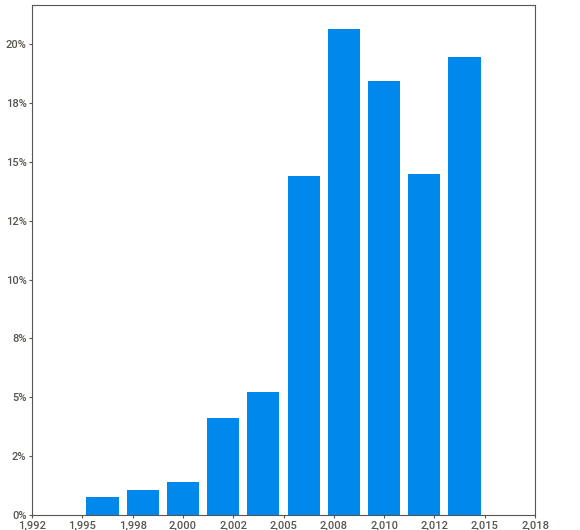
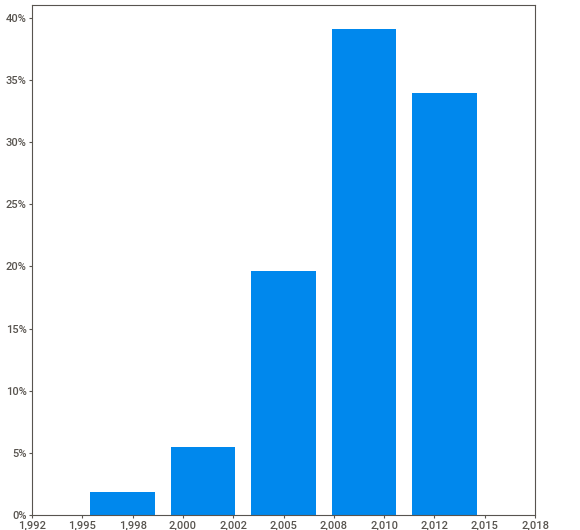
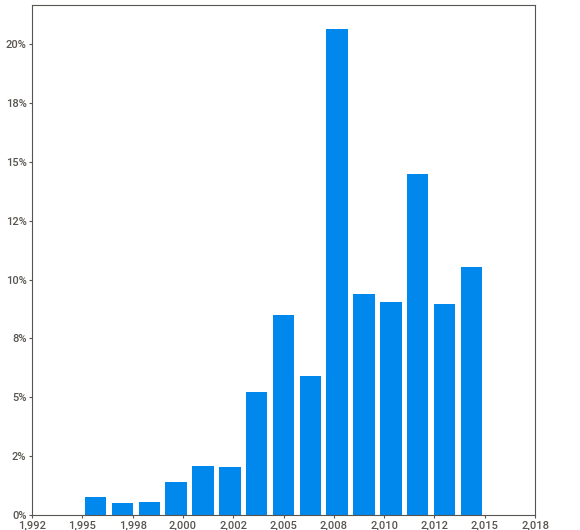
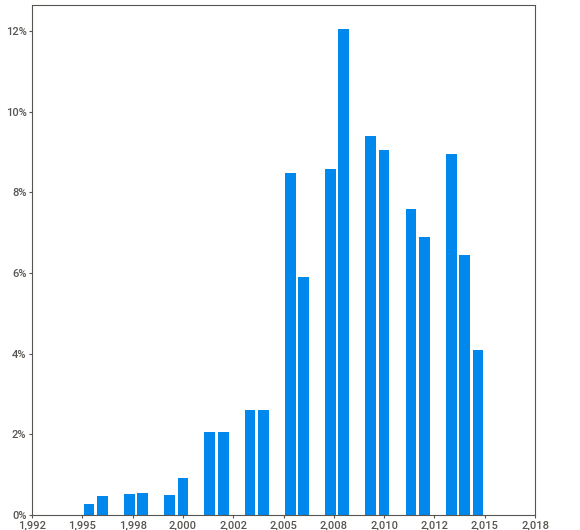
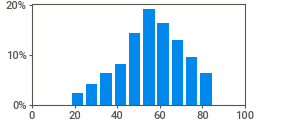
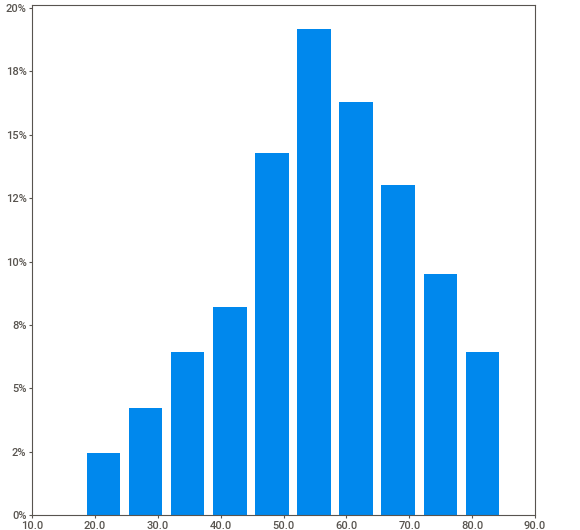
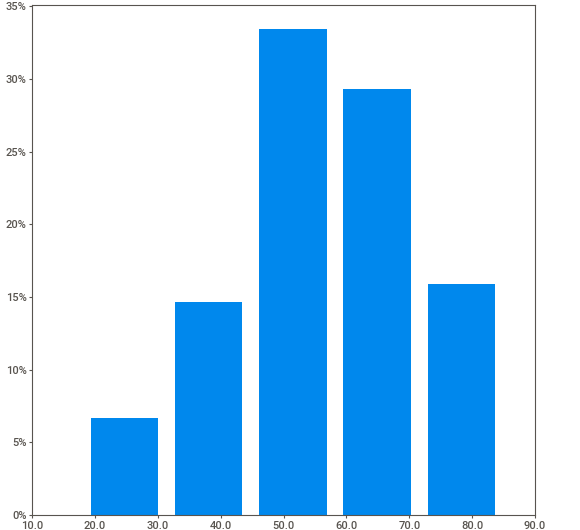
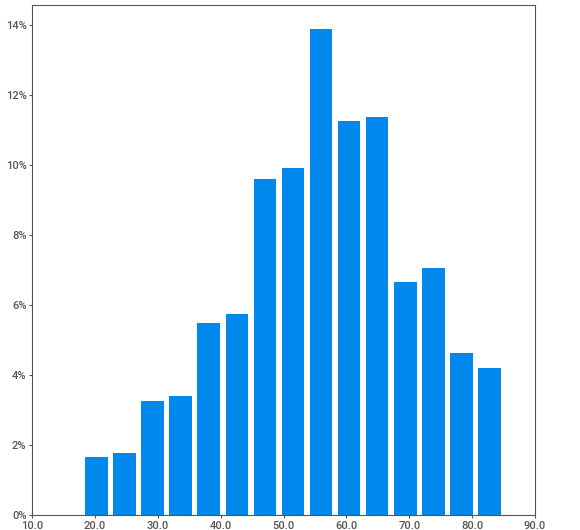
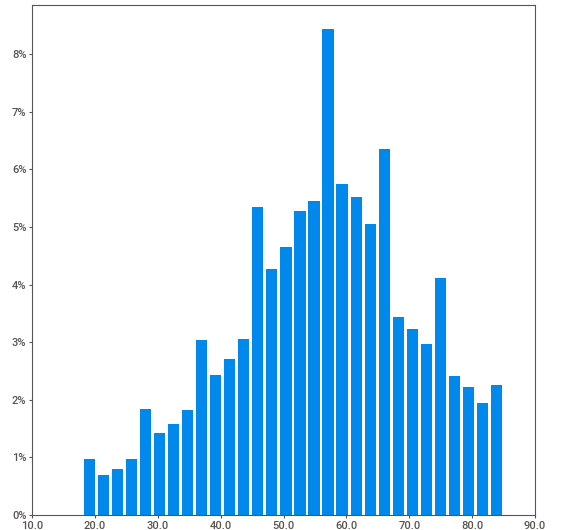
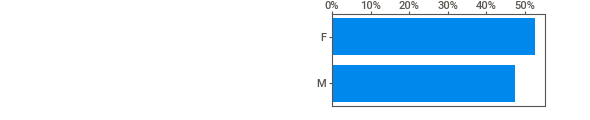
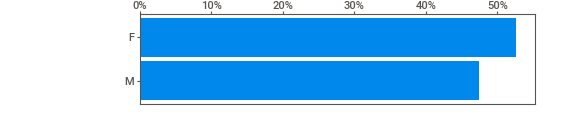
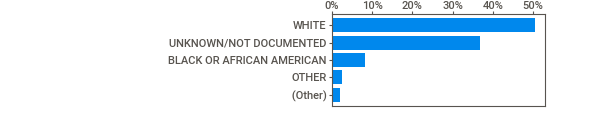
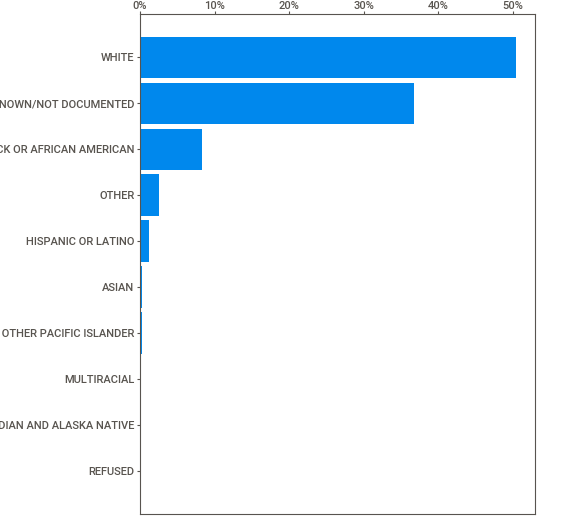
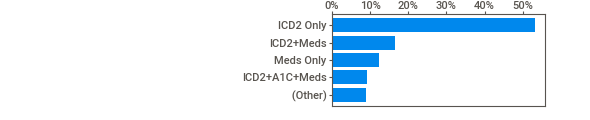
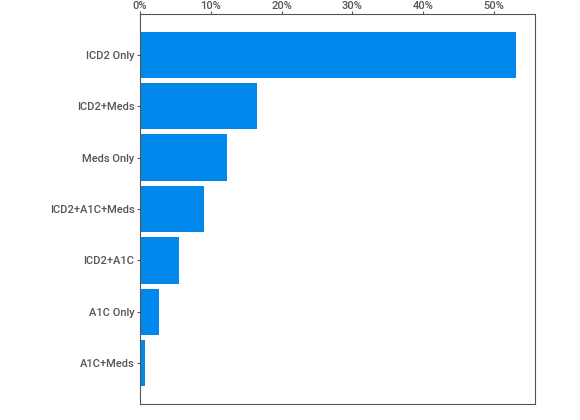
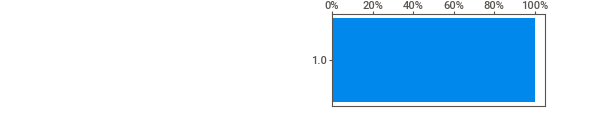
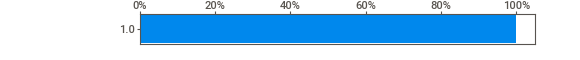
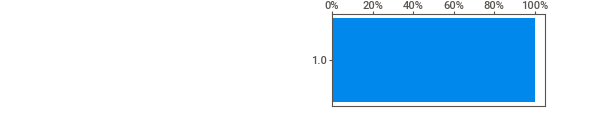
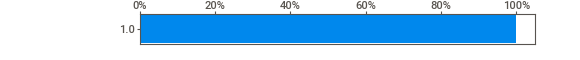
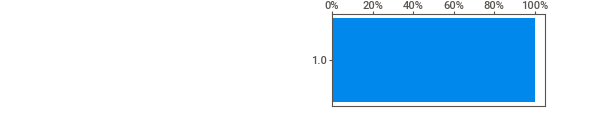
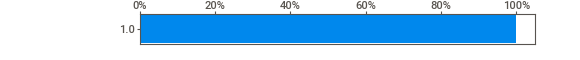
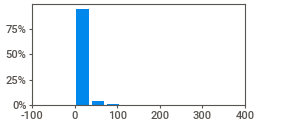
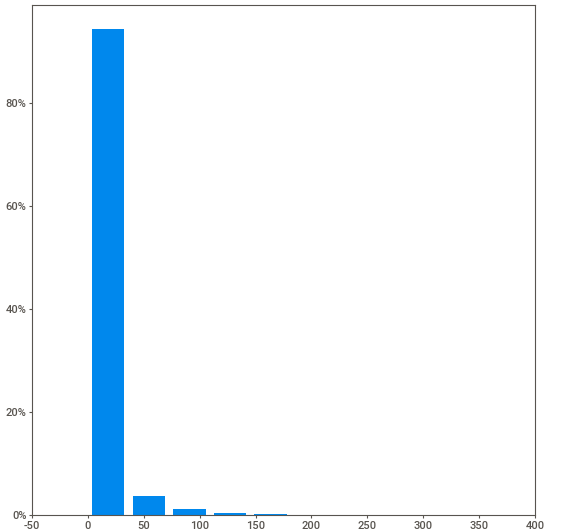
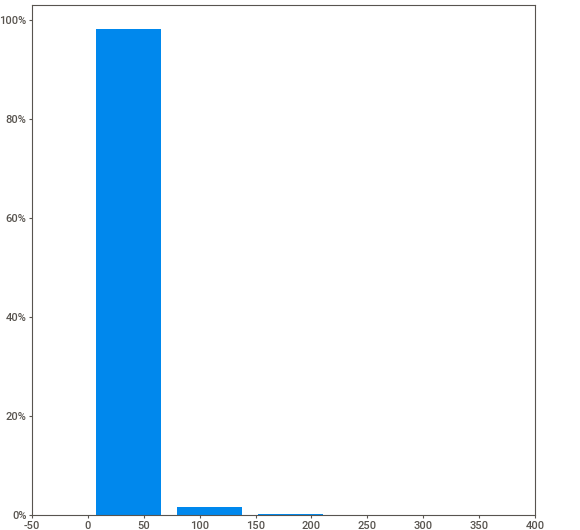
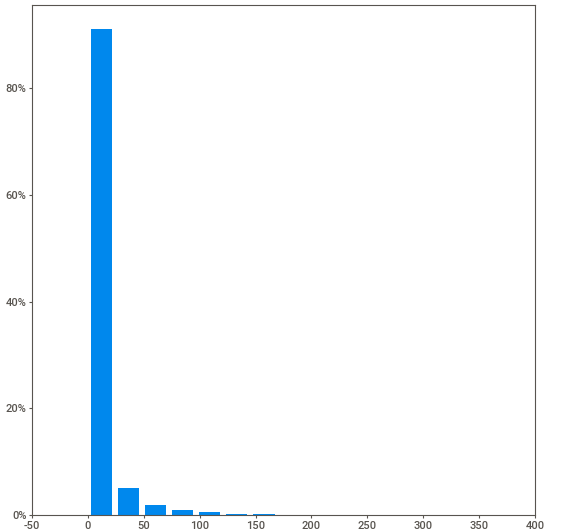
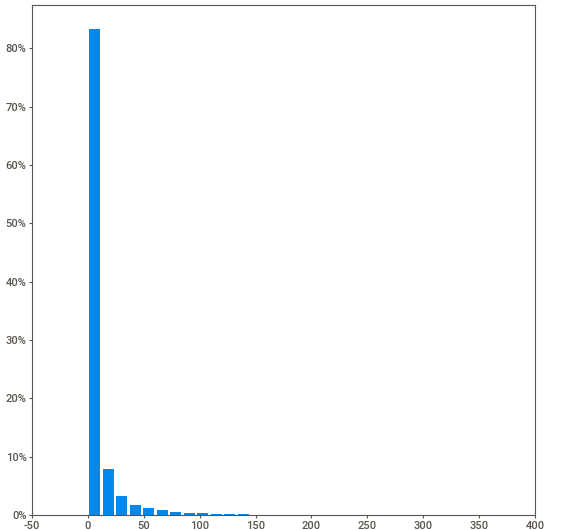
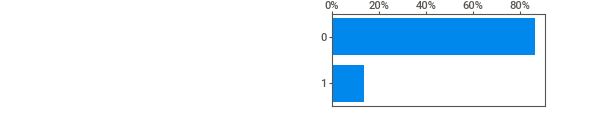
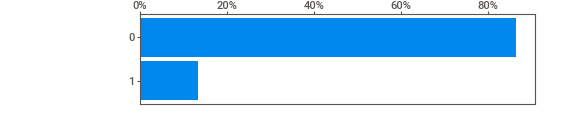
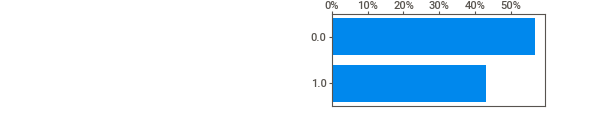
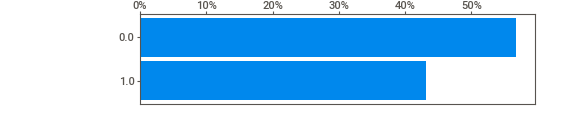
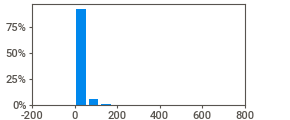
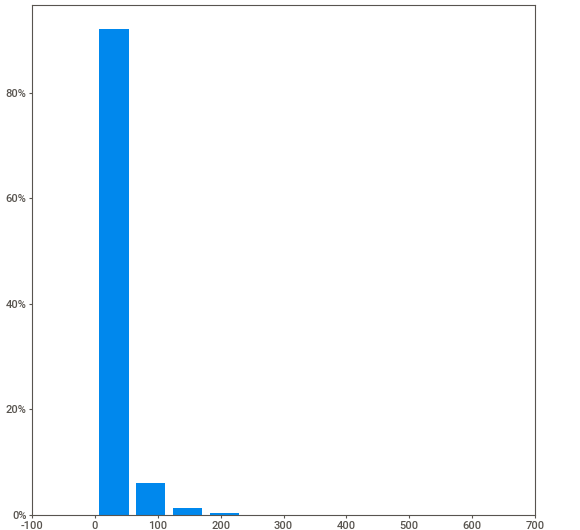
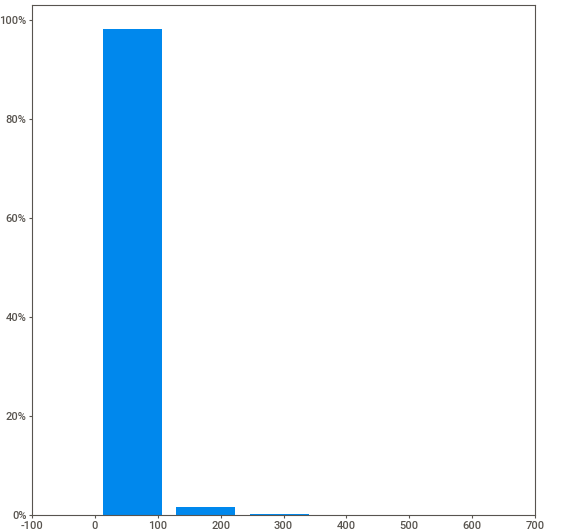
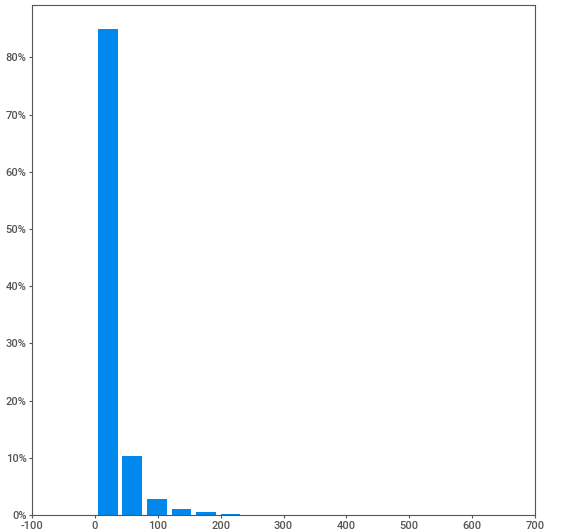
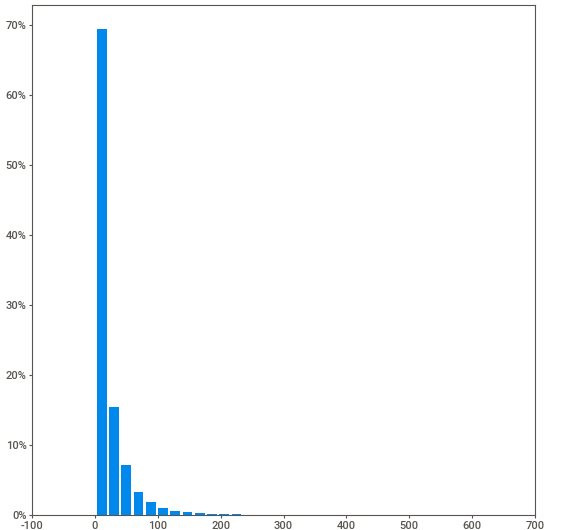
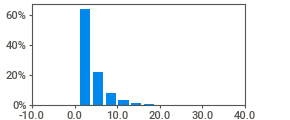
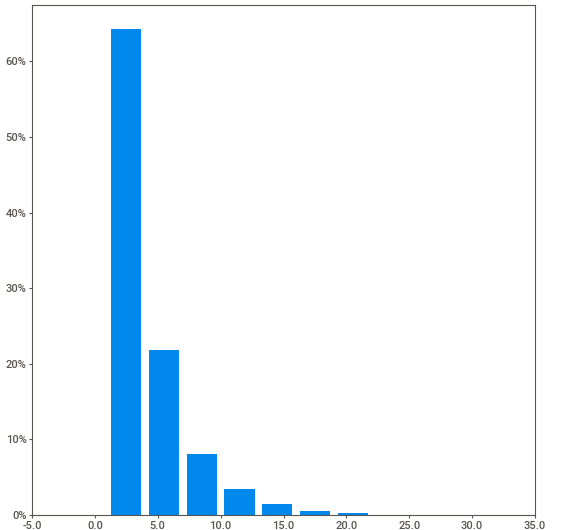
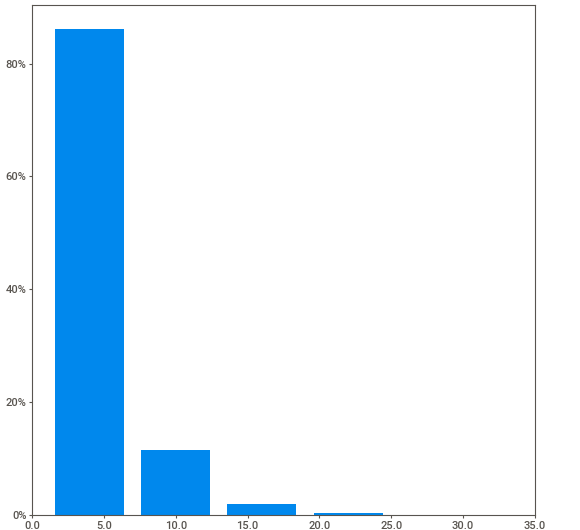
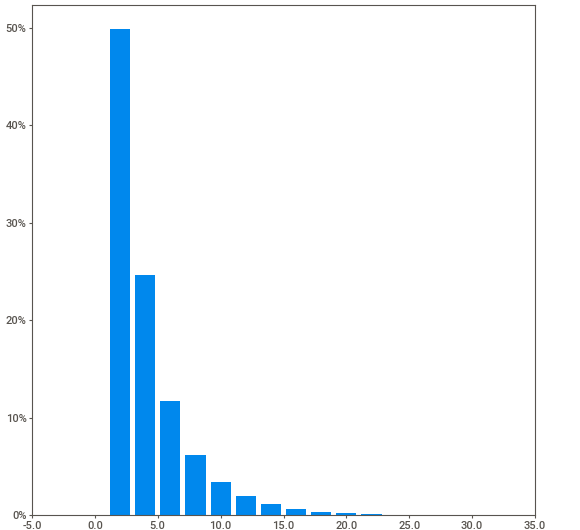
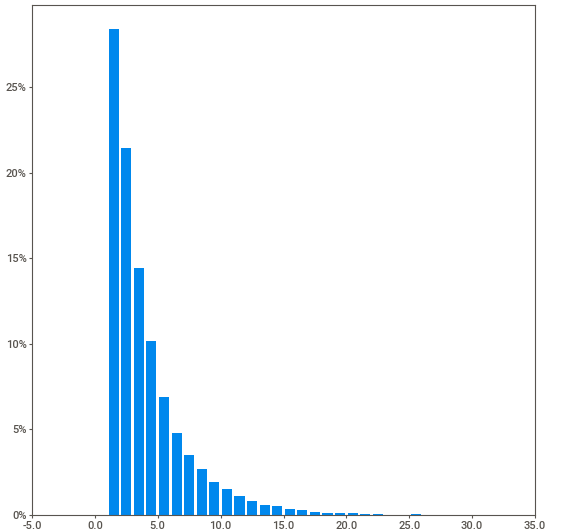
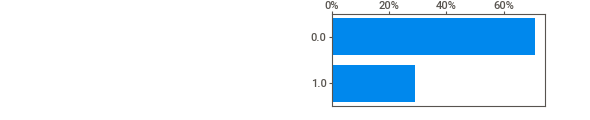
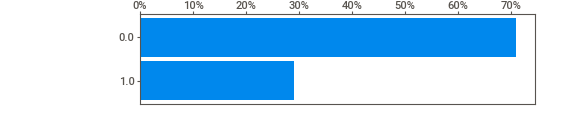
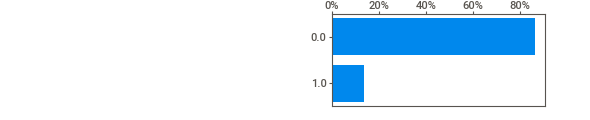
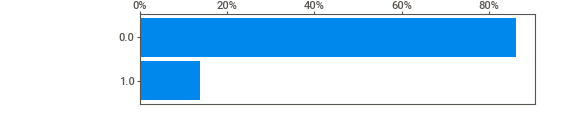
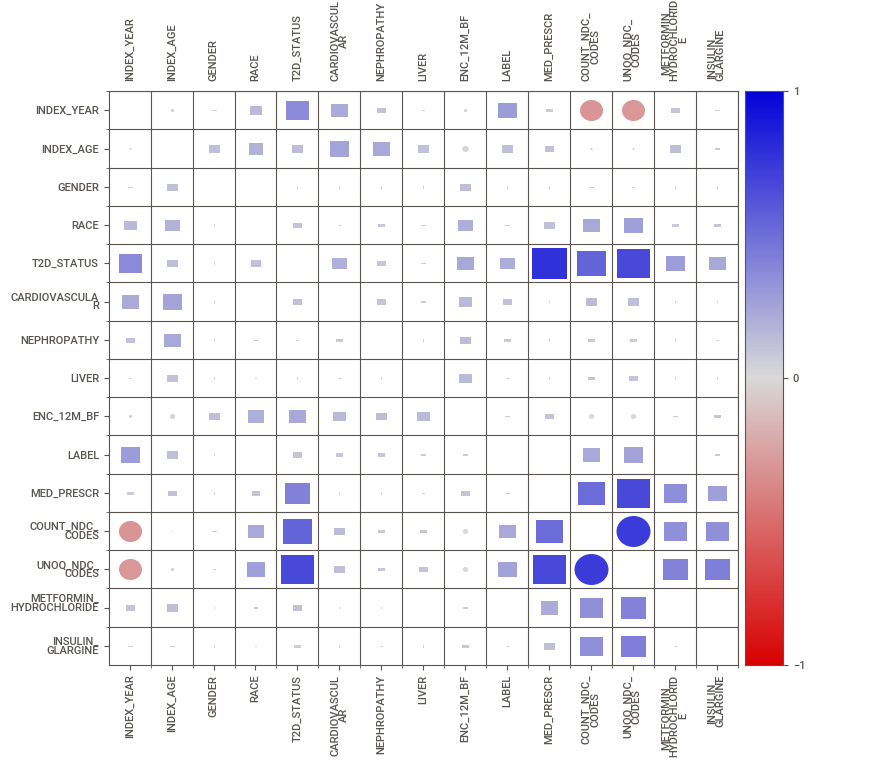
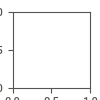

In [40]:
cohort_analysis = sv.analyze(cohort)  
cohort_analysis.show_notebook()

<h2>Comparing  subsets of Inpatients and Outpatients side-by-side</h2>

Another way to get insights from the data is to use the comparison functionality to split final cohort into 2 sub-populations.

                                             |                                             | [  0%]   00:00 ->…


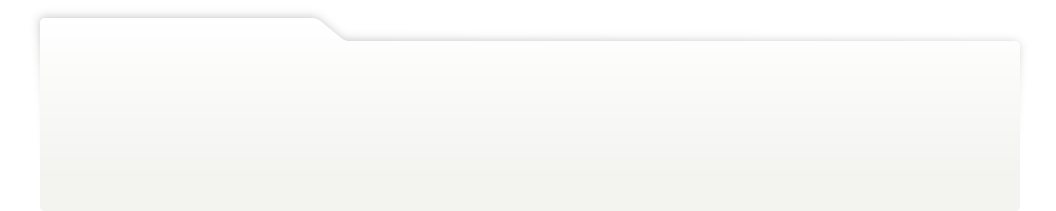
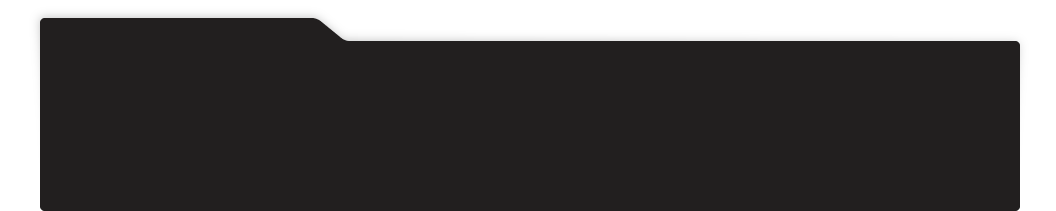
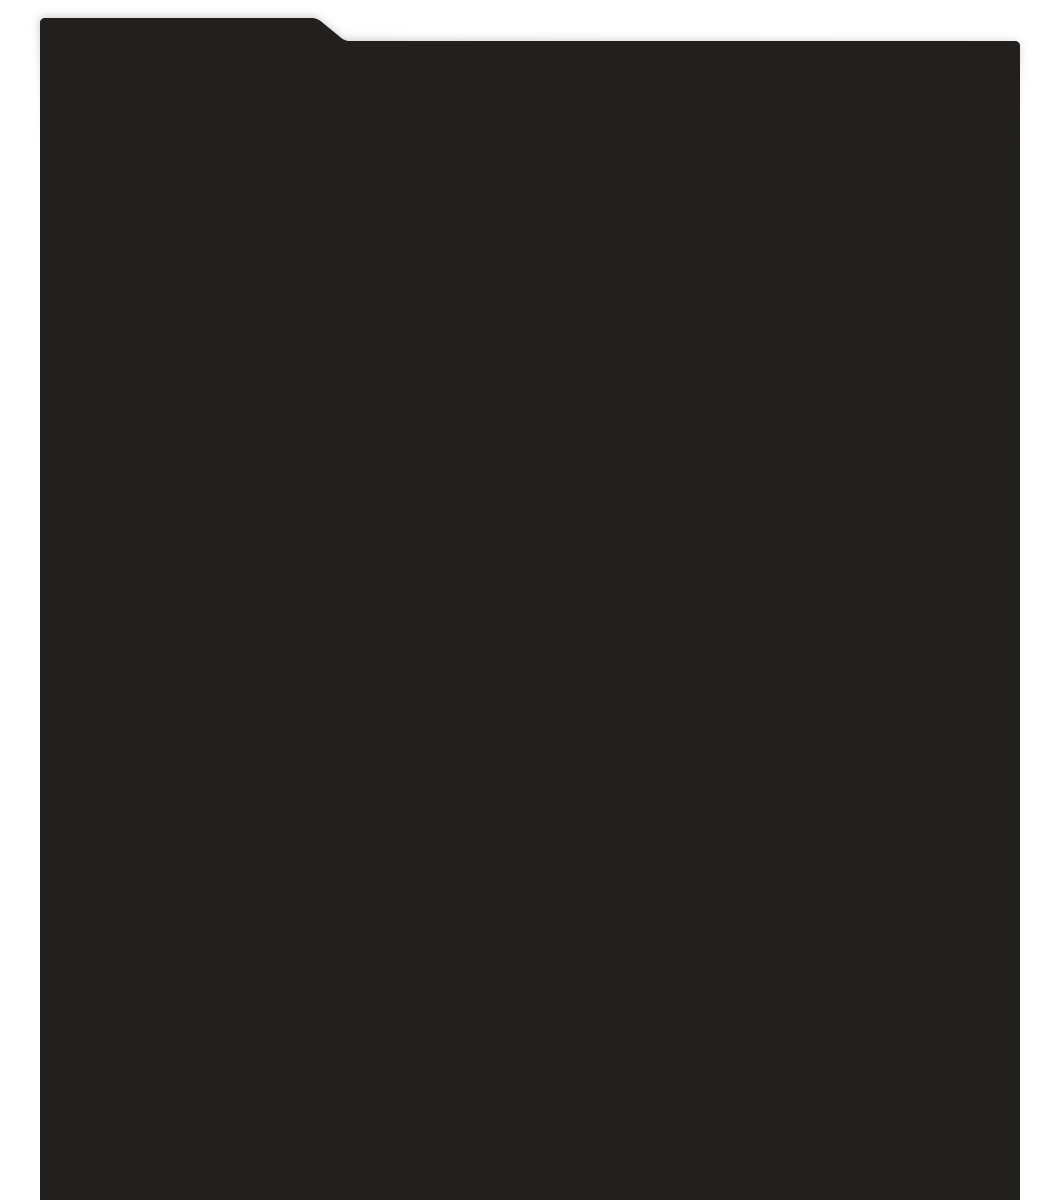
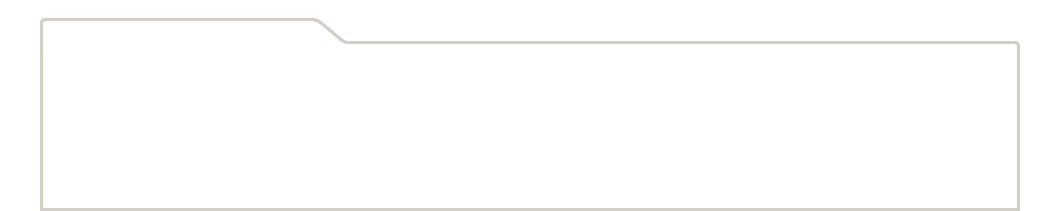
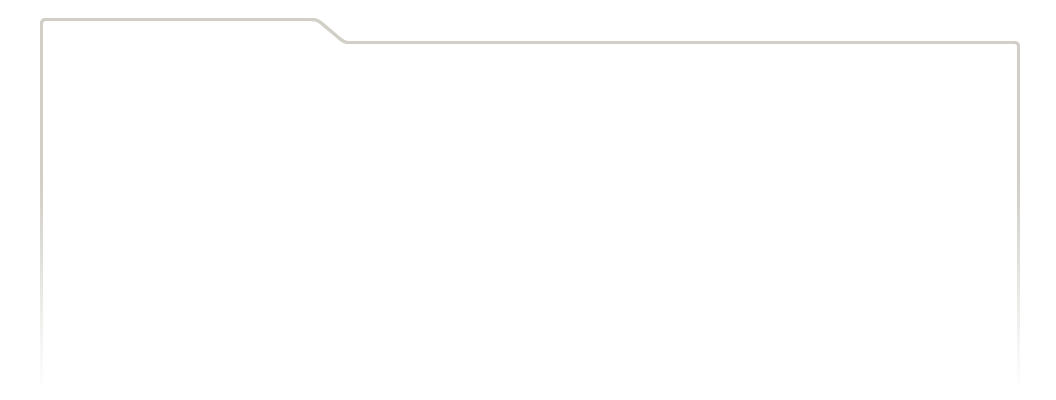
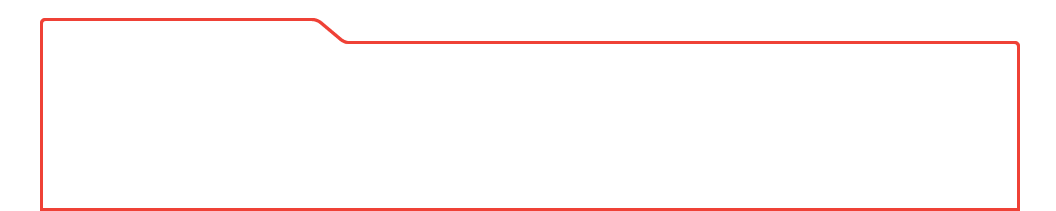
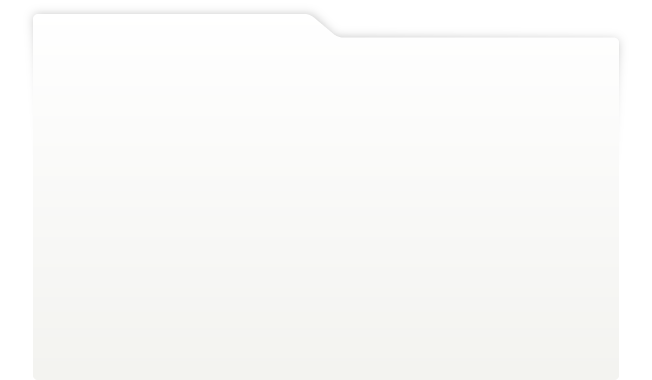
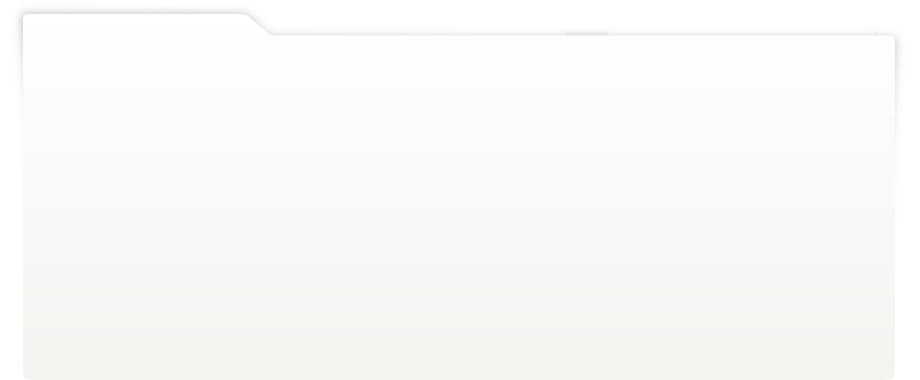
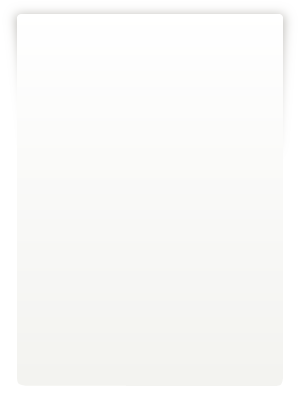
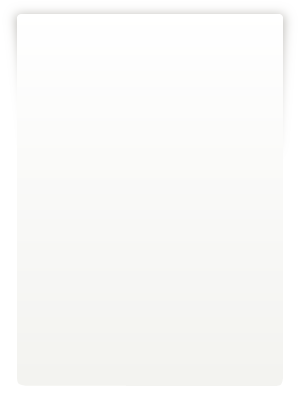
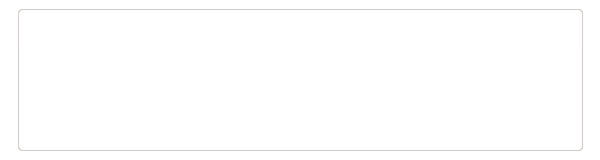
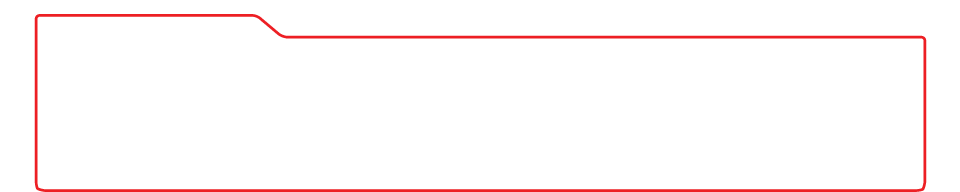
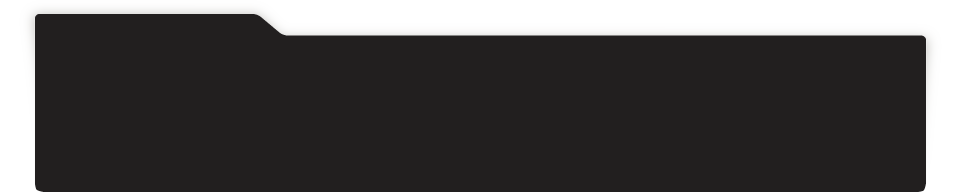
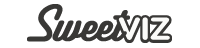
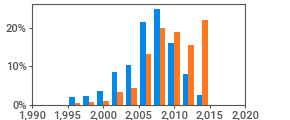
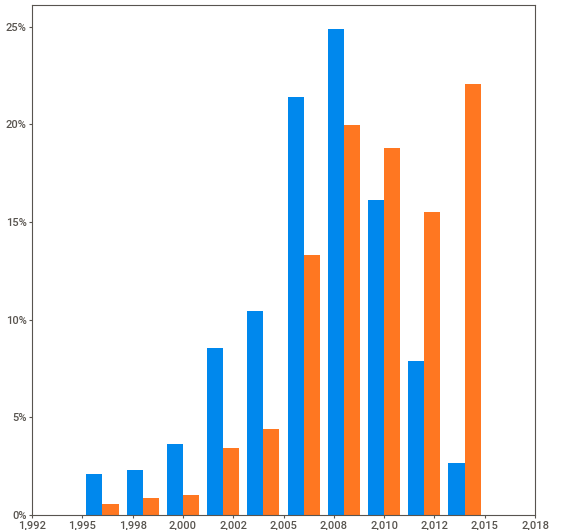
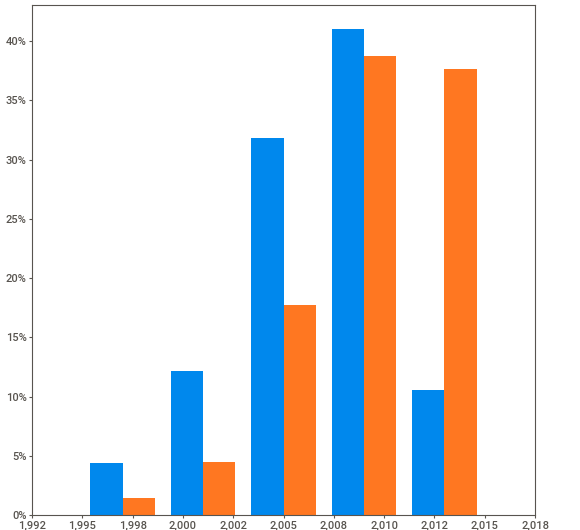
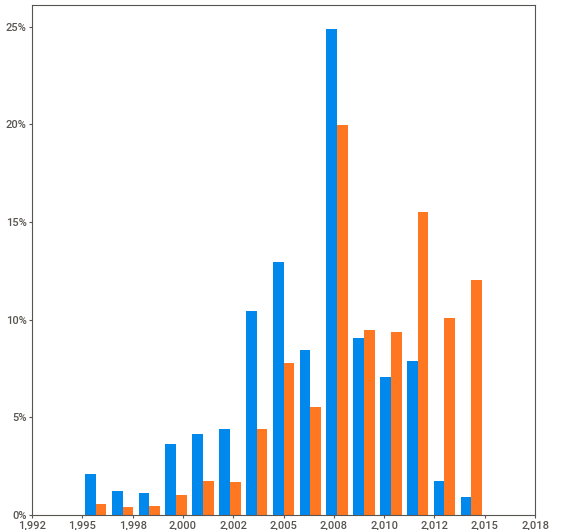
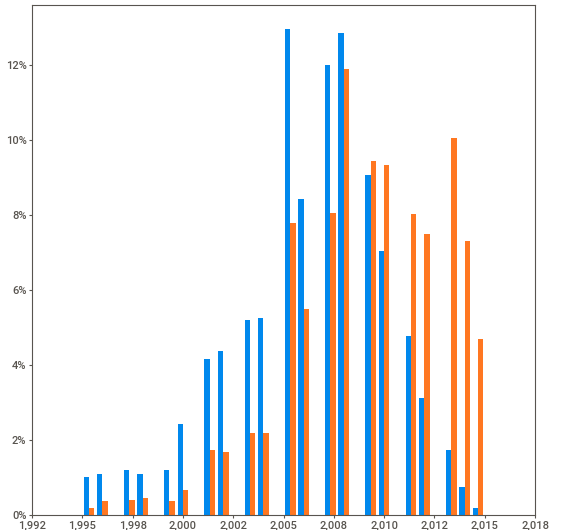
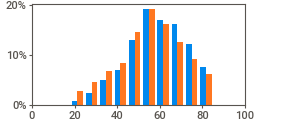
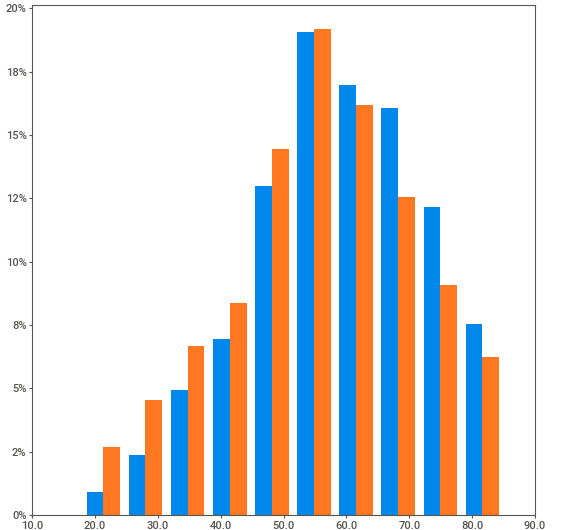
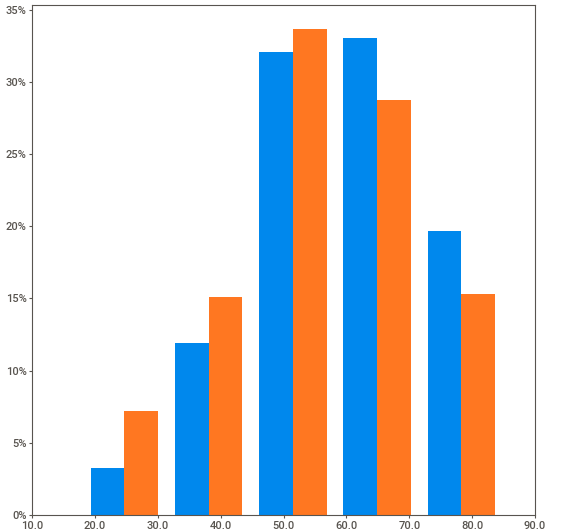
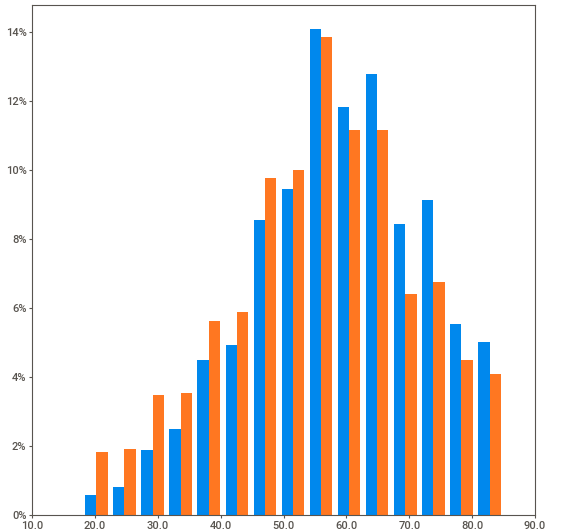
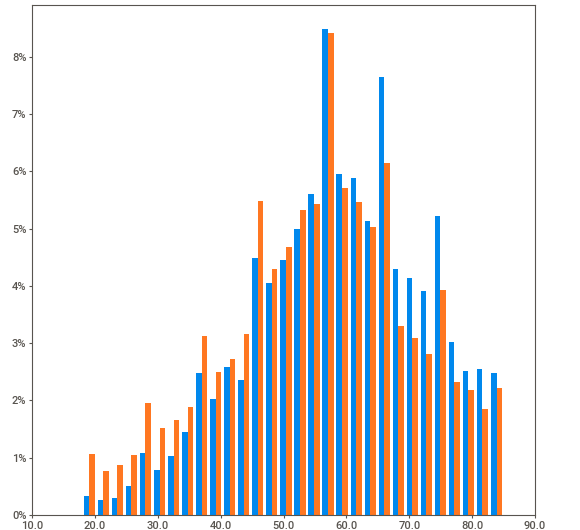
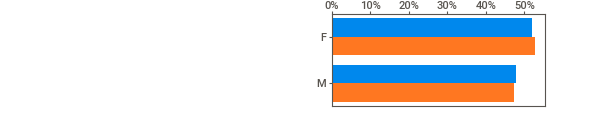
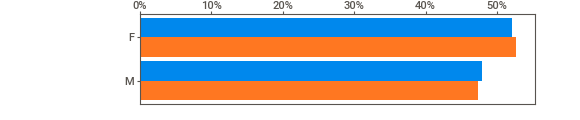
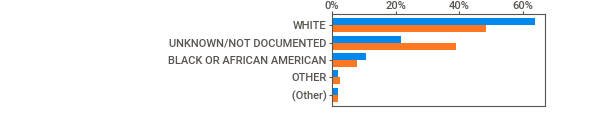
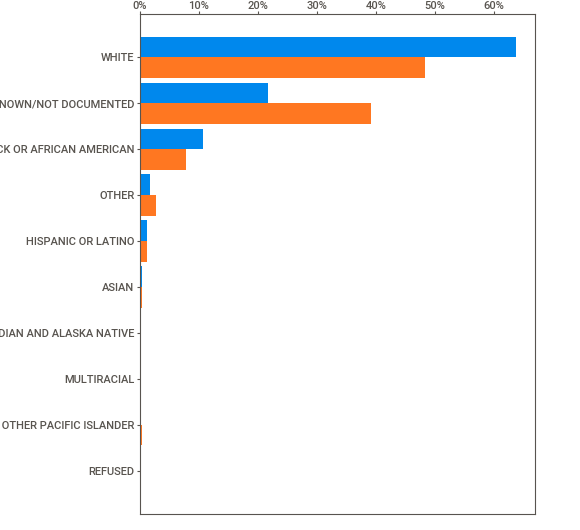
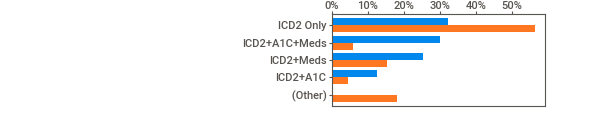
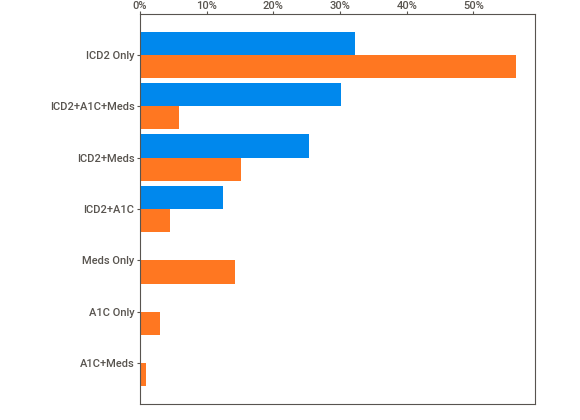
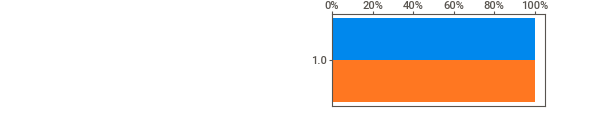
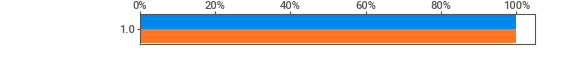
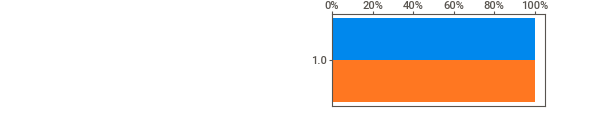
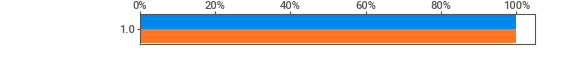
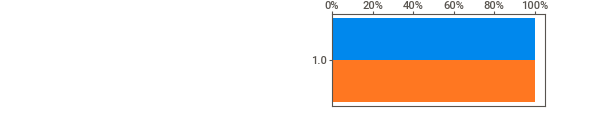
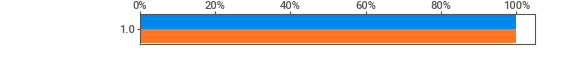
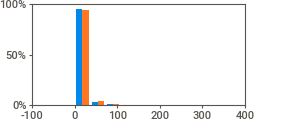
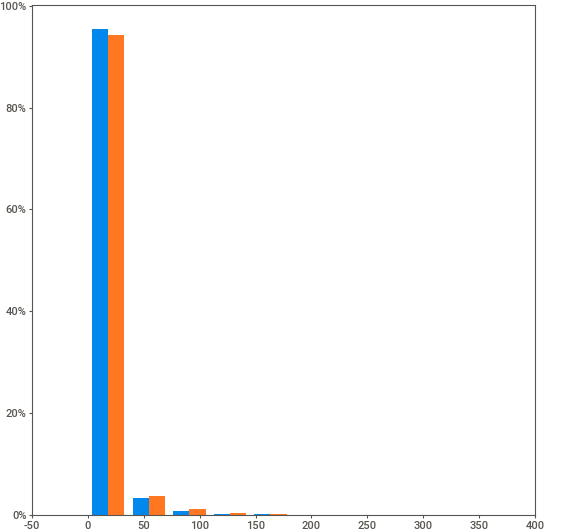
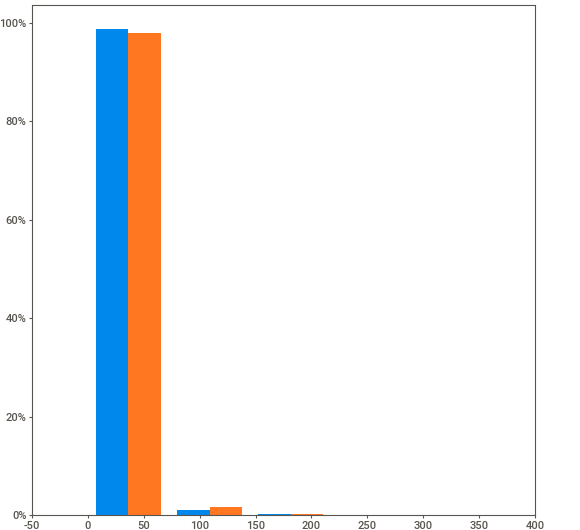
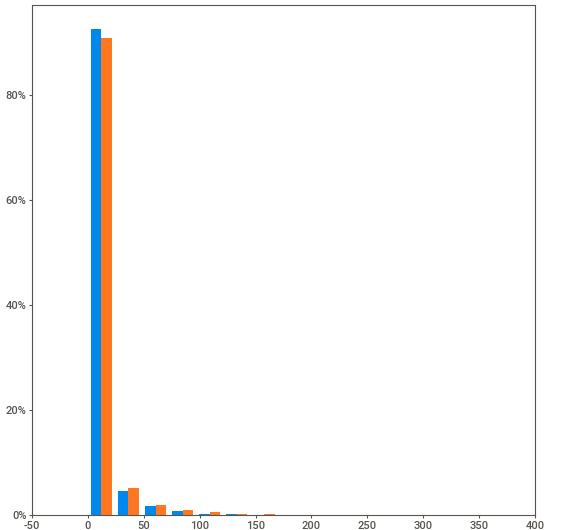
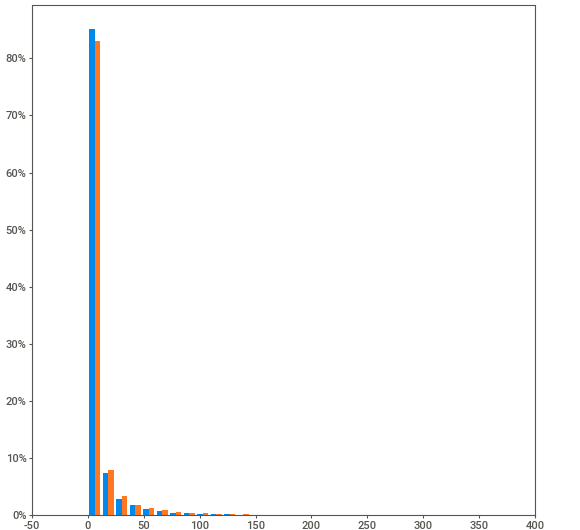
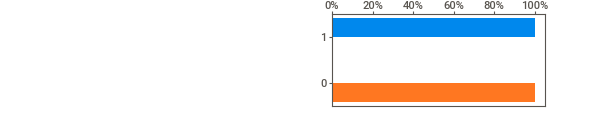
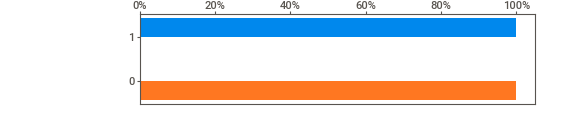
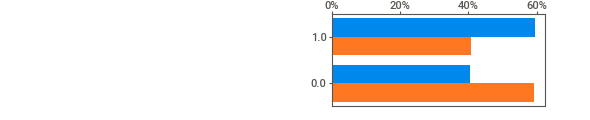
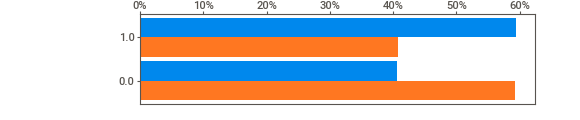
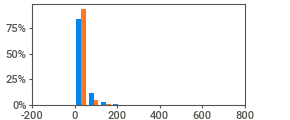
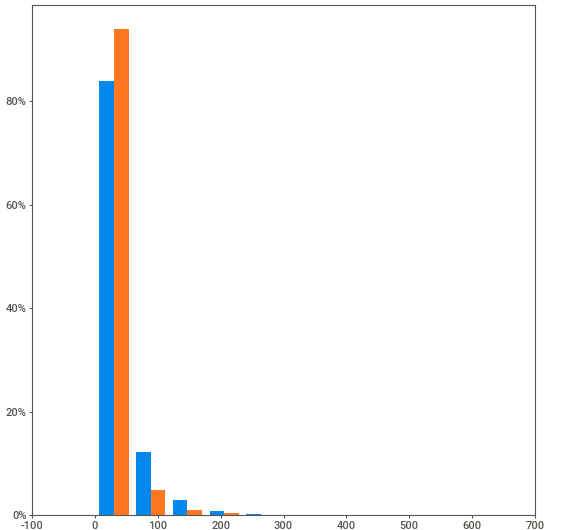
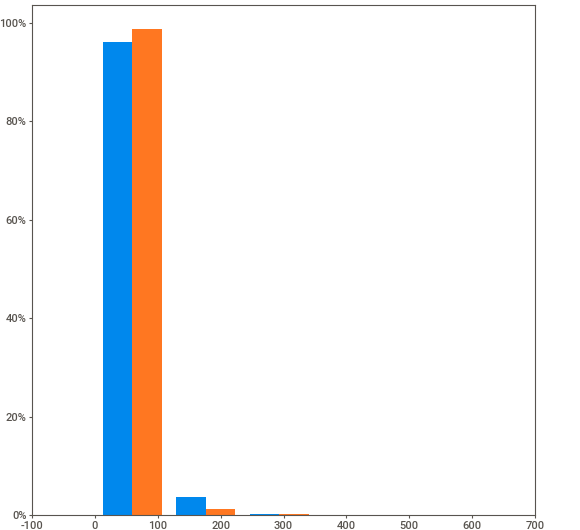
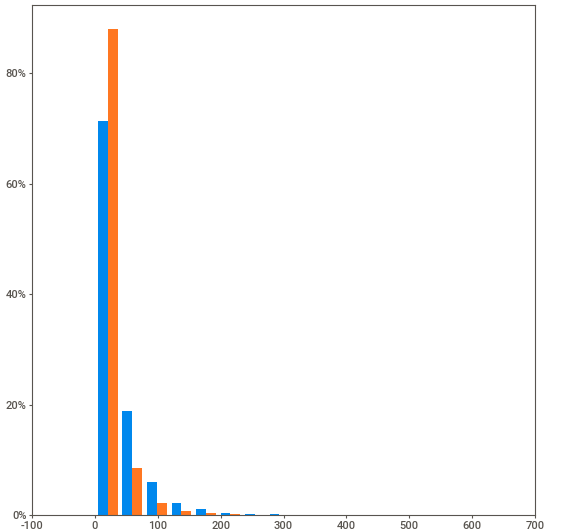
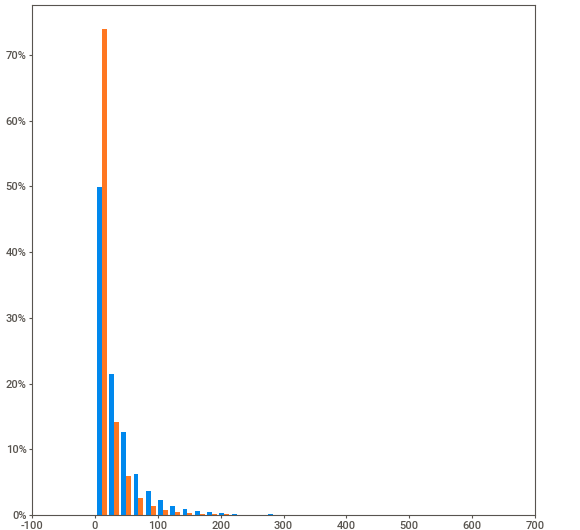
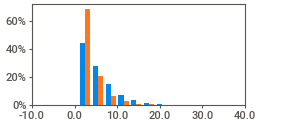
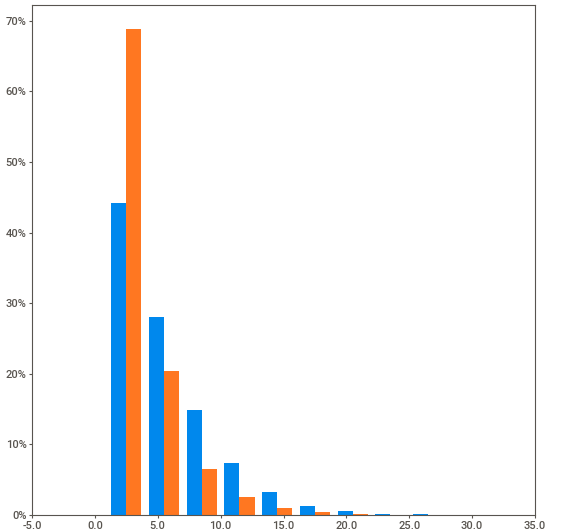
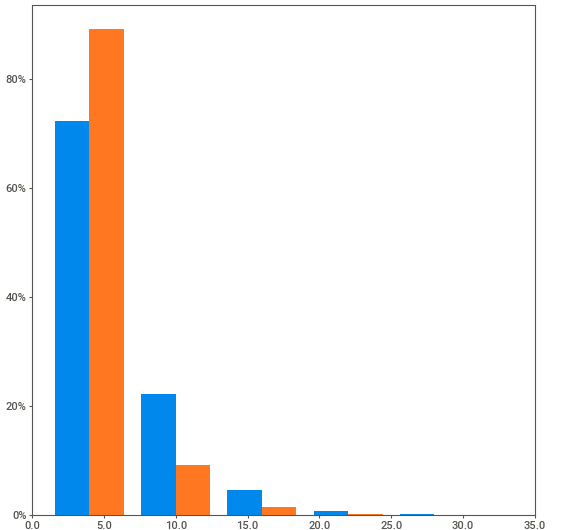
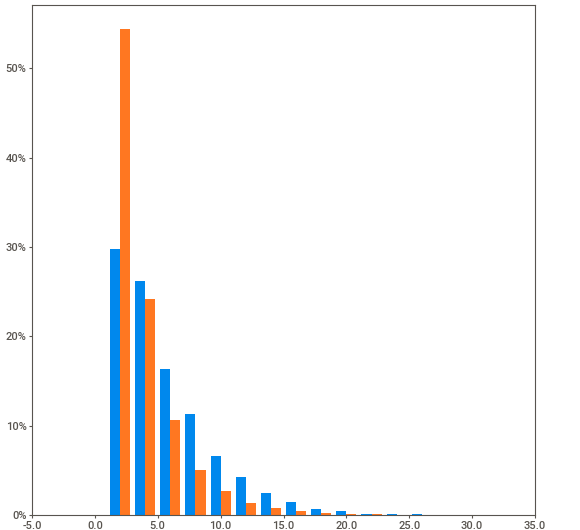
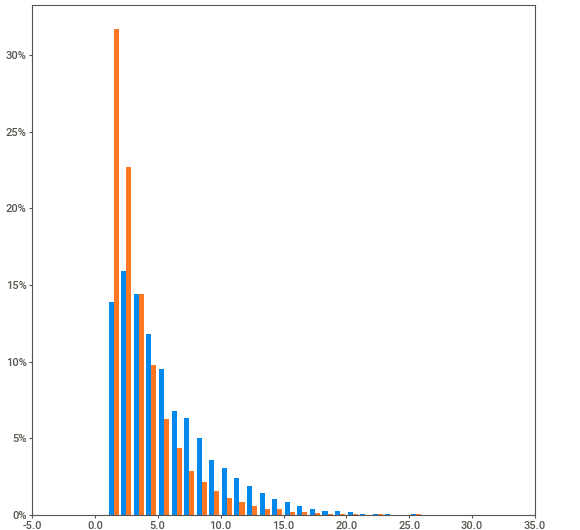
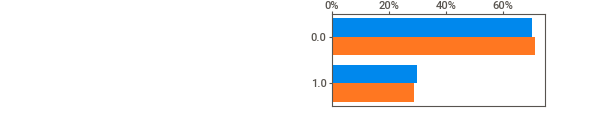
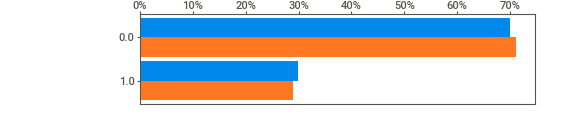
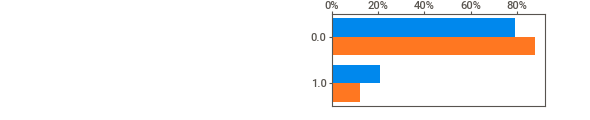
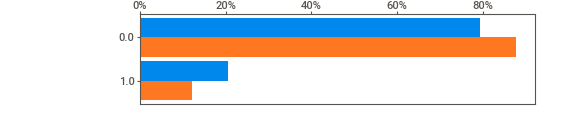
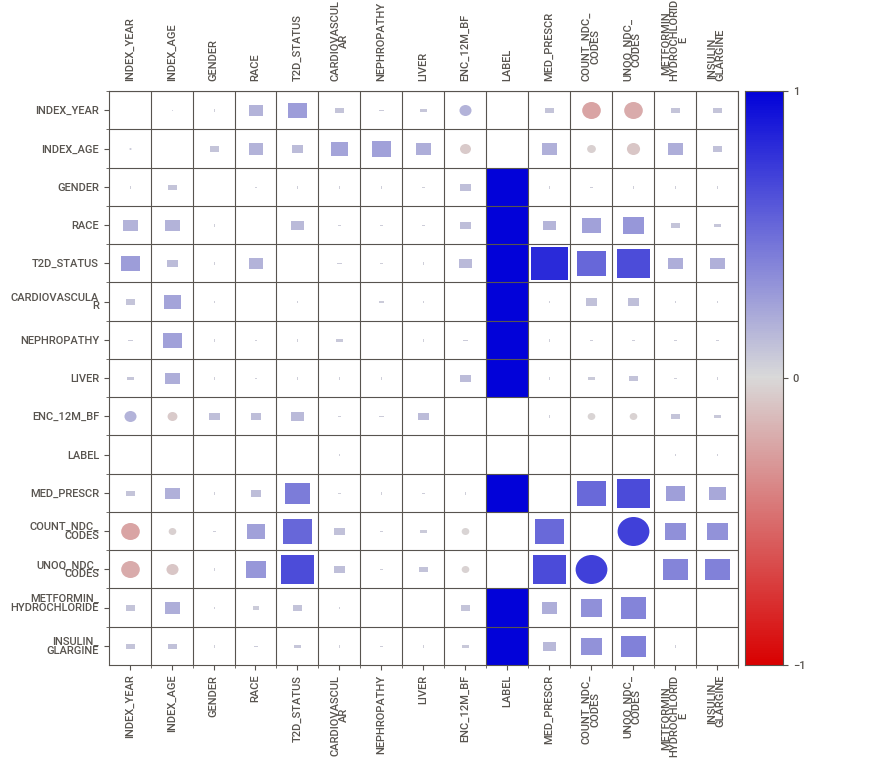
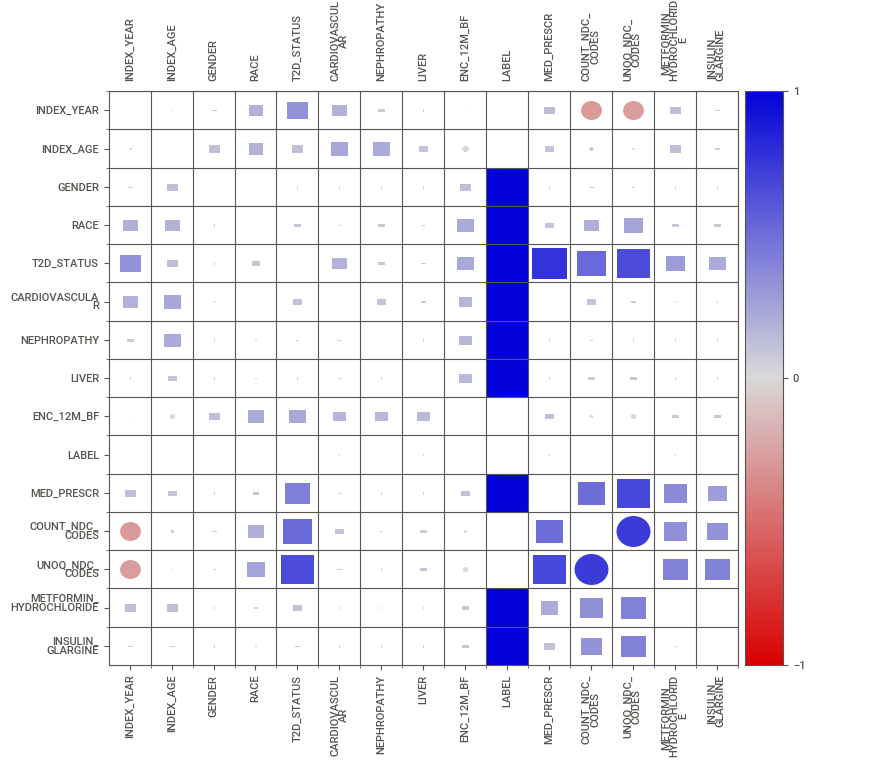

In [41]:
#Another way to get great insights is to use the comparison functionality to split your dataset into 2 sub-populations.
my_report = sv.compare_intra(cohort, cohort["LABEL"] == 1, ["Inpatients due to diabetes", "Outpatients"])
my_report.show_notebook()

In [19]:
#my_report.show_html('10_adm.html')

# Data Wrangling

# Model Development

# Model Evaluation

# Data Analysis 